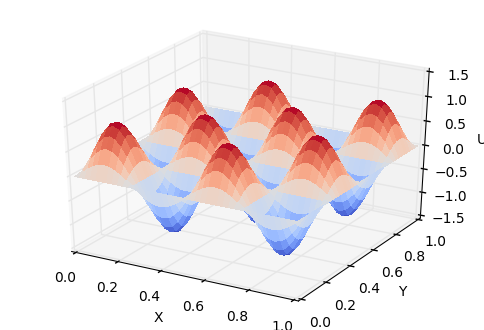

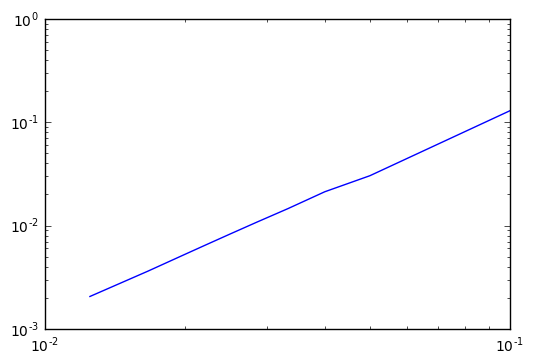

Convergence rate is:  1.96514966141


In [1]:
import numpy as np
import scipy.linalg as la

%matplotlib inline  
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


def fdm_poisson_2d(N,k,plot_show): # bcd
    '''The simplest Dirichlet 2D Poisson implementation.'''

    # Gridsize
    h = 1.0/N

    # Define grid points
    x = np.linspace(0, 1, N+1)
    y = np.linspace(0, 1, N+1)
    
    dofs=((N+1)**2);
    
    # Define zero matrix A of right size and insert
    # non zero entries
    A  = np.zeros((dofs, dofs)) # should be sparse
    
    F  = np.zeros((dofs, 1))
    ue = np.zeros((dofs, 1))
    
    Uh = np.zeros((N+1,N+1))
    # X  = np.zeros((N+1,N+1))
    # Y  = np.zeros((N+1,N+1))
    
    # Define banded part of A, we ommit i,j=0,N+1 b.c
    for i in range(1, N):             # 0,N+1
        for j in range(1, N):         # 0,N+1
            m=i*(N+1)+j # new ordering
            # Compute f: rhs, and ue: exact solution
            F[m]  = -2*(2.0*k*h*np.pi)**2*np.sin(2.0*k*np.pi*x[i])*np.sin(2.0*k*np.pi*y[j])
            
            # Compute matrix entries
            A[m,m]   = -4             #U[i, j]   = -4
            A[m,m-1] =  1             #U[i, j-1] =  1
            A[m,m+1] =  1             #U[i, i+1] =  1
            A[m,(i-1)*(N+1)+j] = 1    #U[i-1, i] =  1
            A[m,(i+1)*(N+1)+j] = 1    #U[i+1, i] =  1
            
    # Specifying boundary conditions
    for i in [0,N]:
        for j in range(0,N+1):
            m=i*(N+1)+j # new ordering
            A[m,m]   = 1.0 #U[i, j] = 1.0
            F[m] = 0.0
            
    for j in [0,N]:
        for i in range(0,N+1):
            m=i*(N+1)+j # new ordering
            A[m,m]   = 1.0 #U[i, j] = 1.0
            F[m] = 0.0
            #print(i,',',j,': ',m)
            
    #print(A)
    
    # Solve AU = F
    U = la.solve(A, F)
    
    for i in range(0, N+1):             # 0,N+1
        for j in range(0, N+1):         # 0,N+1
            m=i*(N+1)+j # new ordering
            
            Uh[i,j] = U[m] # for plotting purposes
            ue[m] = np.sin(2*k*np.pi*x[i])*np.sin(2*k*np.pi*y[j])

    err = max(np.abs(ue - U))
    #print("Error max |U - u| ")
    #print(err)
    
    if plot_show:
        X, Y = np.meshgrid(x, y)

        # plotting routines
        pd.set_option('html',False)
        pd.set_option('max_columns',30)
        pd.set_option('max_rows',10)

        # What follows is a copy of the 3D plot example code.

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        surf = ax.plot_surface(X, Y, Uh, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
        # ax.scatter(xs, ys, zs, c=c, marker=m)

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Uh')

        plt.show()
        
    return h, err

Nf = 40
k=2

h,err=fdm_poisson_2d(Nf, k, 1) # for plot
    # Solve for 4 levels    

N_vec=[10,20,25,30,35,40,45,50,60,80]

error = np.zeros(len(N_vec))
mesh  = np.zeros(len(N_vec))

for i in range(0,len(N_vec)):
    #print(i)
    N=N_vec[i]
    h,err = fdm_poisson_2d(N, 2, 0) 
    mesh[i]=h
    error[i]=err
    #print(err)
    
plt.loglog(mesh, error, "-b")
plt.show ()

conv_rate=np.log(error[-2]/error[-1])/np.log(mesh[-2]/mesh[-1])
print('Convergence rate is: ',conv_rate)
#print(mesh, error)